<a href="https://colab.research.google.com/github/AycaCicek/DogrusalOlmayanRegresyonModelleri/blob/main/GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
data=pd.read_csv("/content/Hitters.csv")
data.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [3]:
data=data.dropna()
data_encoding=pd.get_dummies(data[["League","Division","NewLeague"]])
data_encoding.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [4]:
#--> bağımlı değişken : 
y = data["Salary"]
#--> Bağımlı DEğişken : 
X_=data.drop(data[["Salary","League","Division","NewLeague"]],axis=1).astype("float64")

X = pd.concat([X_,data_encoding[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [5]:
len(X)

263

In [6]:
len(y)

263

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=42)

Model & Tamin

In [8]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)

In [9]:
gbm_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [10]:
y_pred=gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

325.1580294468938

Model Tuning

In [16]:
? gbm_model

In [17]:
params={'learning_rate': [0.001,0.01,0.1],
        "max_depth": [3,5,8],
       "n_estimators": [100,200,500],
        "subsample": [1,0.5,0.8],
        "loss": ['absolute_error', 'huber', 'quantile']}

In [18]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)

In [19]:
gbm_cv_model=GridSearchCV(gbm_model,params,cv=10,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=

In [20]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'huber',
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [26]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.01, loss="huber", max_depth=3, n_estimators=200, subsample=0.8).fit(X_train,y_train)

In [27]:
y_pred=gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

368.22844147423905

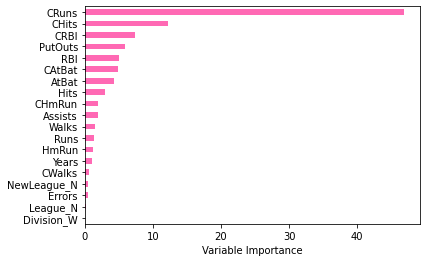

In [29]:
#degısken onem duzeyi
Importance=pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="hotpink",)
plt.xlabel("Variable Importance")
plt.gca().legend_ = None